In [13]:
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from scipy.stats import zscore
from IPython.display import display
from scipy.stats import skew, kurtosis
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
from mlxtend.frequent_patterns import apriori, association_rules


In [14]:
df = pd.read_parquet('df_final_univariado.parquet')

In [15]:
df.dtypes[df.dtypes == 'datetime64[ns]']

dataProduto                     datetime64[ns]
dataVencimentoRegistro          datetime64[ns]
dataPublicacao                  datetime64[ns]
apresentacoes.dataPublicacao    datetime64[ns]
dtype: object

In [16]:
#crear columna de año del producto y combertir dato a entero
df['anio_producto'] = df['dataProduto'].dt.year.astype(int)




In [17]:
df.dtypes

nomeProduto                                  string[python]
numeroProcesso                               string[python]
empresaNome                                  string[python]
principioAtivo                               string[python]
tarja                                              category
medicamentoReferencia                        string[python]
classesTerapeuticas                          string[python]
categoriaRegulatoria                               category
dataProduto                                  datetime64[ns]
dataVencimentoRegistro                       datetime64[ns]
dataPublicacao                               datetime64[ns]
apresentacoes.codigo                         string[python]
apresentacao                                 string[python]
apresentacoes.dataPublicacao                 datetime64[ns]
registro                                     string[python]
principiosAtivos                             string[python]
embalagemSecundariaTodas                

In [18]:
df.restricaoPrescricao_es.unique()

array(['Venta bajo prescripción médica con retención de receta',
       'Venta bajo prescripción médica', 'No informado',
       'Venta sin prescripción médica',
       'Venta bajo prescripción médica sujeta a notificación de receta tipo A',
       'Venta bajo receta de control especial',
       'Venta bajo prescripción médica sujeta a notificación de receta tipo B',
       'Venta bajo prescripción médica sujeta a notificación de receta tipo B2',
       'Dispensación sujeta a recetario del programa ITS/VIH-SIDA'],
      dtype=object)

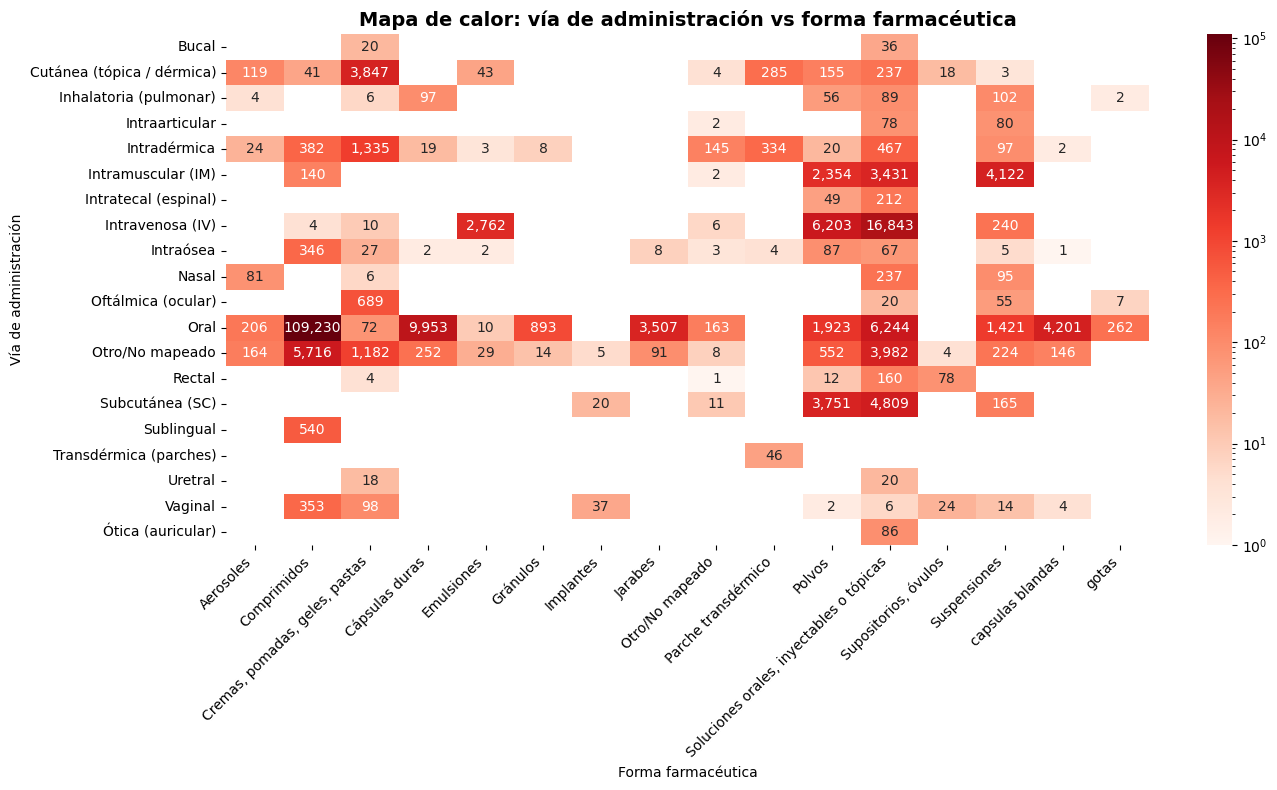

In [19]:
# tabla de contingencia entre via de administracion y forma farmaceutica ordenada por forma farmaceutica

crosstab_via_vs_forma = pd.crosstab( df['via_administracion'],
            df['forma_farmaceutica'])

plt.figure(figsize=(14, 8))
sns.heatmap(crosstab_via_vs_forma, cmap="Reds", annot=True, fmt=",",norm=LogNorm(),cbar=True)

plt.title("Mapa de calor: vía de administración vs forma farmacéutica", fontsize=14, weight="bold")
plt.xlabel("Forma farmacéutica")
plt.ylabel("Vía de administración")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


* **Asociación fuerte entre ciertas vías y formas**

Oral + Comprimidos (109,230) y Oral + Cápsulas duras (9,953) confirman que la gran mayoría de medicamentos orales están en estas dos formas clásicas.

Intravenosa (IV) + Soluciones (16,843) e Intramuscular (IM) + Suspensiones (4,122) indica que las soluciones son predominantes para las via intravenosa, y las suspensiones para vias intramusculares.

Cutánea (tópica) + Cremas/pomadas/geles/pastas (3,847) es muy consistente con la práctica clínica: los tópicos suelen formularse en cremas/gel.
* **Uso de la categoría "Otro/No mapeado"**

Hay valores grandes en “Otro/No mapeado” (ej. 5,716 en Comprimidos, 3,982 en Soluciones).

Esto puede reflejar inconsistencias o falta de estandarización en el dataset. Es importante revisarlo porque puede estar mezclando información que debería estar en categorías específicas.


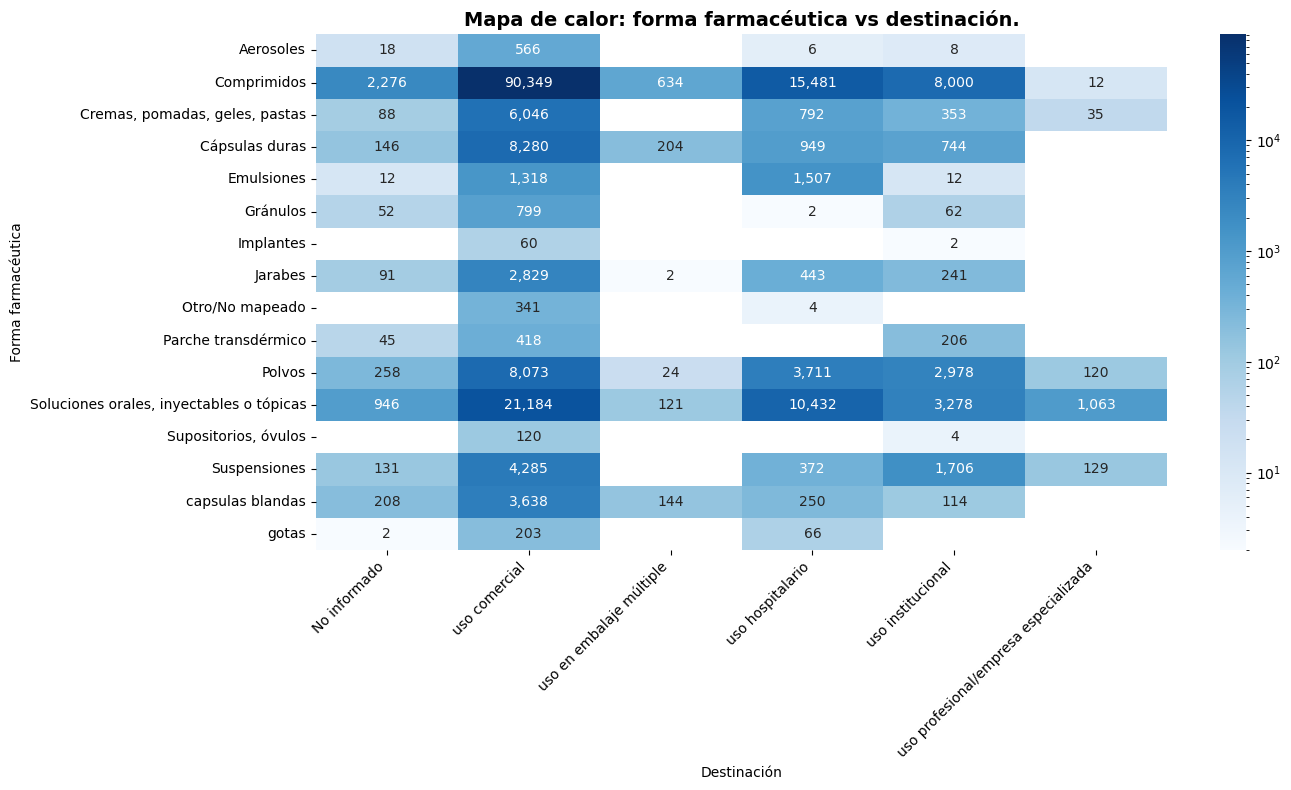

In [20]:
crosstab_forma_vs_destinacion = pd.crosstab( df['forma_farmaceutica'],
            df['destinacao_es'])

plt.figure(figsize=(14, 8))
sns.heatmap(crosstab_forma_vs_destinacion, cmap="Blues", annot=True, fmt=",",norm=LogNorm(),cbar=True)

plt.title("Mapa de calor: forma farmacéutica vs destinación.", fontsize=14, weight="bold")
plt.xlabel("Destinación")
plt.ylabel("Forma farmacéutica")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

* Patrones dominantes
oral - uso comercial: Es por mucho el mas predominante.
las vias de administración intravenosa, intramuscular y subcutaneo tienen una alta presencia en el uso hospitalario e institucional, sin embargo son mayores en el uso comercial, eso no muestra que el mercado comercial es muy importante en Brasil.

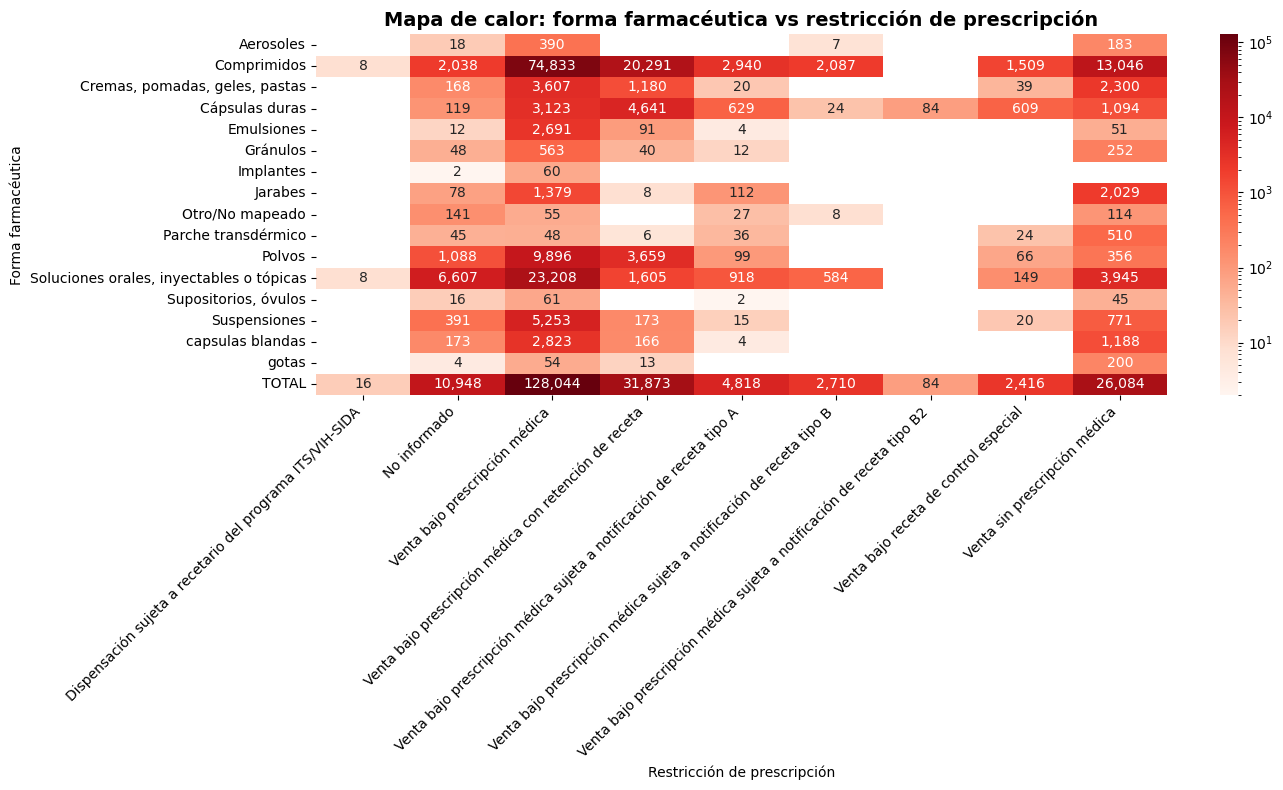

In [ ]:
crosstab_via_vs_restriccion = pd.crosstab(
    df['forma_farmaceutica'],
    df['restricaoPrescricao_es']
)

crosstab_via_vs_restriccion.loc['TOTAL'] = crosstab_via_vs_restriccion.sum()

plt.figure(figsize=(14, 8))
sns.heatmap(
    crosstab_via_vs_restriccion,
    cmap="Reds",
    annot=True,
    fmt=",",
    norm=LogNorm(),
    cbar=True
)

plt.title("Mapa de calor: forma farmacéutica vs restricción de prescripción", fontsize=14, weight="bold")
plt.xlabel("Restricción de prescripción")
plt.ylabel("Forma farmacéutica")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


la gran mayoria de los medicamentos registrados son de venta bajo prescripción medica, dejando atras a la venta sin prescipción medica, dando a entender un fuerte regulación para el acceso a demedicamentos.

In [32]:
df.dtypes

nomeProduto                                  string[python]
numeroProcesso                               string[python]
empresaNome                                  string[python]
principioAtivo                               string[python]
tarja                                              category
medicamentoReferencia                        string[python]
classesTerapeuticas                          string[python]
categoriaRegulatoria                               category
dataProduto                                  datetime64[ns]
dataVencimentoRegistro                       datetime64[ns]
dataPublicacao                               datetime64[ns]
apresentacoes.codigo                         string[python]
apresentacao                                 string[python]
apresentacoes.dataPublicacao                 datetime64[ns]
registro                                     string[python]
principiosAtivos                             string[python]
embalagemSecundariaTodas                

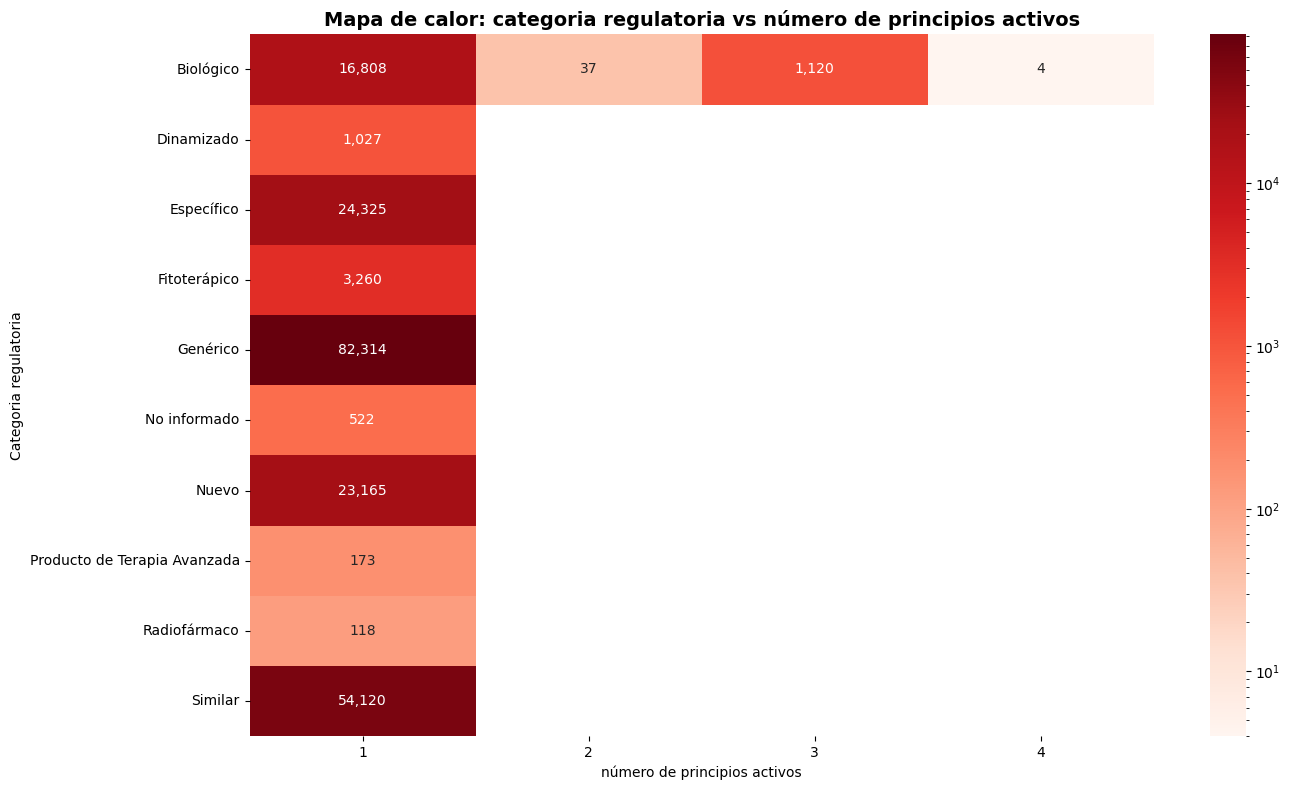

In [38]:
crosstab_categoria_vs_num_activos = pd.crosstab(
    df['categoriaRegulatoria_es'],
    df['num_principios_activos']
)
plt.figure(figsize=(14, 8))
sns.heatmap(
    crosstab_categoria_vs_num_activos,
    cmap="Reds",
    annot=True,
    fmt=",",
    norm=LogNorm(),
    cbar=True
)

plt.title("Mapa de calor: categoria regulatoria vs número de principios activos", fontsize=14, weight="bold")
plt.xlabel("número de principios activos")
plt.ylabel("Categoria regulatoria")
#plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Existe una evidente relación entre la cantidad de principios activos y los medicamentos biologicos.**

In [22]:
# 1. Seleccionamos solo las columnas categóricas de interés
df_sub = df[['via_administracion', 'forma_farmaceutica', 'tarja_es']]

# 2. One-hot encoding
df_hot = pd.get_dummies(df_sub)

# 3. Itemsets frecuentes
frequent_itemsets = apriori(df_hot, min_support=0.05, use_colnames=True)

# 4. Reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by="confidence", ascending=False)

# 5. Traducir reglas a lenguaje natural
def traducir_regla(antecedents, consequents, support, confidence, lift):
    ant = ", ".join([a.split("_",1)[1] for a in antecedents])
    con = ", ".join([c.split("_",1)[1] for c in consequents])
    return (f"Si {ant} → entonces {con} "
            f"(soporte={support:.0%}, confianza={confidence:.0%}, lift={lift:.2f})")

# Creamos lista con las primeras 10 reglas
reglas_naturales = []
for _, row in rules.head(10).iterrows():
    reglas_naturales.append(
        traducir_regla(row['antecedents'], row['consequents'], 
                       row['support'], row['confidence'], row['lift'])
    )

# Mostramos
for r in reglas_naturales:
    print(r)


Si es_Franja roja con restricción, farmaceutica_Comprimidos → entonces administracion_Oral (soporte=10%, confianza=97%, lift=1.45)
Si es_Sin franja, farmaceutica_Comprimidos → entonces administracion_Oral (soporte=5%, confianza=96%, lift=1.44)
Si es_Franja roja, farmaceutica_Comprimidos → entonces administracion_Oral (soporte=28%, confianza=96%, lift=1.43)
Si farmaceutica_Comprimidos → entonces administracion_Oral (soporte=53%, confianza=94%, lift=1.40)
Si es_Franja roja, administracion_Oral → entonces farmaceutica_Comprimidos (soporte=28%, confianza=89%, lift=1.58)
Si es_Sin franja → entonces administracion_Oral (soporte=8%, confianza=87%, lift=1.30)
Si es_Franja roja con restricción → entonces administracion_Oral (soporte=13%, confianza=85%, lift=1.27)
Si farmaceutica_Comprimidos, es_No informado → entonces administracion_Oral (soporte=9%, confianza=84%, lift=1.25)
Si administracion_Oral → entonces farmaceutica_Comprimidos (soporte=53%, confianza=79%, lift=1.40)
Si administracion_Ora

En el análisis de reglas de asociación, el **soporte** indica el porcentaje de registros que cumplen la regla completa dentro del dataset. 
La **confianza** mide la probabilidad de que ocurra la consecuencia dado que se cumple el antecedente. 
El **lift** muestra la fuerza de la relación: un valor mayor a 1 significa que la ocurrencia conjunta es más frecuente de lo esperado por azar.  

De los resultados se observa que los medicamentos en **forma farmacéutica de comprimidos** y con **tarja roja** se asocian fuertemente con la **vía de administración oral**, alcanzando altos niveles de confianza (superiores al 90%). Además, la relación entre **administración oral** y **comprimidos** tiene un lift significativo, lo que confirma que esta combinación es mucho más común de lo esperado. En conclusión, existe una fuerte dependencia entre la forma farmacéutica y la vía de administración, y la tarja roja refuerza aún más esta asociación.
